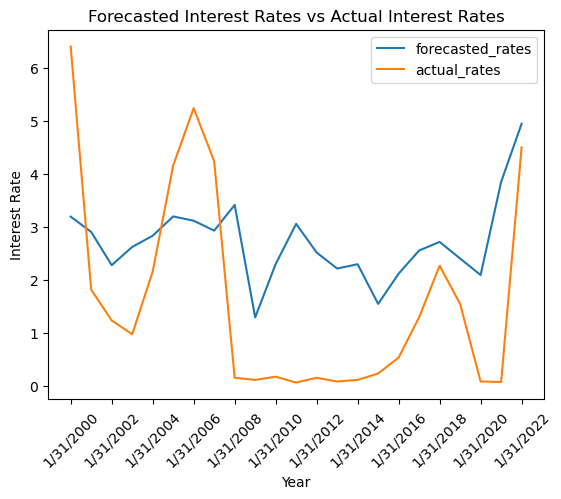

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data for the past year
df = pd.read_csv('US.csv', index_col=0)

# Set the parameters of the Taylor rule
alpha = 0.5
beta = 0.5
r_neutral = 2.5

# Extract the relevant columns from the data
df['inflation_gap'] = df['inflation'] - df['inflation_target']
df['output_gap'] = ((df['output'] / df['output_target'])-1)
df['actual_rates'] = df['fed_rate']

# Calculate the forecasted interest rate
forecasted_rate = r_neutral + alpha *df.inflation_gap + beta * df.output_gap

# Initialize an empty list to store the forecasted rates
forecasted_rates = []
actual_rates = []

# Loop through each data point and forecast the interest rate
for i in range(len(df)):
  forecasted_rate = r_neutral + alpha * df['inflation_gap'][i] + beta * df['output_gap'][i]
  actual_rate = df['fed_rate'][i]
  
  # Append the forecasted rate and actual rate to the respective lists
  forecasted_rates.append(forecasted_rate)
  actual_rates.append(actual_rate)
    
# Plot the forecasted rates
plt.plot(forecasted_rates, label='forecasted_rates')
plt.plot(actual_rates, label='actual_rates')
plt.xticks(range(len(df)), df.index, rotation=45)
plt.xticks(np.arange(0, len(df), 2), df.index[::2])
plt.xlabel('Year')
plt.ylabel('Interest Rate')
plt.title('Forecasted Interest Rates vs Actual Interest Rates')
plt.legend()
plt.show()